In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
rating_popular_movie = pd.read_csv("finalpopular.csv")
rating_popular_movie.head()

,Unnamed: 0,userId,movieId,rating,title,totalRatingCount
0,0,1,1,4.0,Toy Story (1995),215
1,1,5,1,4.0,Toy Story (1995),215
2,2,7,1,4.5,Toy Story (1995),215
3,3,15,1,2.5,Toy Story (1995),215
4,4,17,1,4.5,Toy Story (1995),215


In [76]:
#previous df with all unseen movie filled as 0 rating
#it is also needed here to sort movie seen by user already
user_to_movie_df=rating_popular_movie.pivot_table(index='userId',columns='title',values='rating').fillna(0)
user_to_movie_df.head()

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),...,Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wolf of Wall Street, The (2013)",X-Men (2000),X-Men: The Last Stand (2006),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Zombieland (2009),Zoolander (2001)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,5.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
4,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
movie_features_df=rating_popular_movie.pivot_table(index='userId',columns="title",values='rating')
movie_features_df.head()
#total 450 movies and 606 users

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),...,Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wolf of Wall Street, The (2013)",X-Men (2000),X-Men: The Last Stand (2006),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Zombieland (2009),Zoolander (2001)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,5.0,5.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
4,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#filling Nan values with mmovie mean, this will create a problem a popular movie being pushed further
for i in movie_features_df.columns:
    movie_features_df[i] = movie_features_df[i].fillna(movie_features_df[i].mean())

In [26]:
movie_features_df.head()

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),...,Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wolf of Wall Street, The (2013)",X-Men (2000),X-Men: The Last Stand (2006),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Zombieland (2009),Zoolander (2001)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.527778,4.149123,3.894495,3.974138,3.68125,3.547297,3.339286,4.000000,3.040373,2.727273,...,5.00000,5.000000,3.916667,5.000000,3.355769,3.723684,3.12,5.000000,3.877358,3.509259
2,3.527778,4.149123,3.894495,3.974138,3.68125,3.547297,3.339286,3.475806,3.040373,2.727273,...,3.87395,3.880435,5.000000,3.699248,3.355769,3.723684,3.12,3.992754,3.000000,3.509259
3,3.527778,4.149123,3.894495,3.974138,3.68125,3.547297,3.339286,3.475806,3.040373,2.727273,...,3.87395,3.880435,3.916667,3.699248,3.355769,3.723684,0.50,3.992754,3.877358,3.509259
4,3.527778,5.000000,3.894495,3.974138,3.68125,3.547297,3.339286,3.475806,3.040373,2.727273,...,4.00000,5.000000,3.916667,3.699248,3.355769,3.723684,3.12,3.992754,3.877358,3.509259
5,3.527778,4.149123,3.894495,3.974138,3.68125,3.547297,3.339286,3.475806,3.000000,2.727273,...,3.87395,3.880435,3.916667,3.699248,3.355769,3.723684,3.12,3.992754,3.877358,3.509259


In [27]:
#take matrix 0f 606x450 from dataframe
data = movie_features_df.values
#calculate U, Sigma, VT from matrix by svd
U, Sigma, VT = np.linalg.svd(data)

In [29]:
len(Sigma)

450

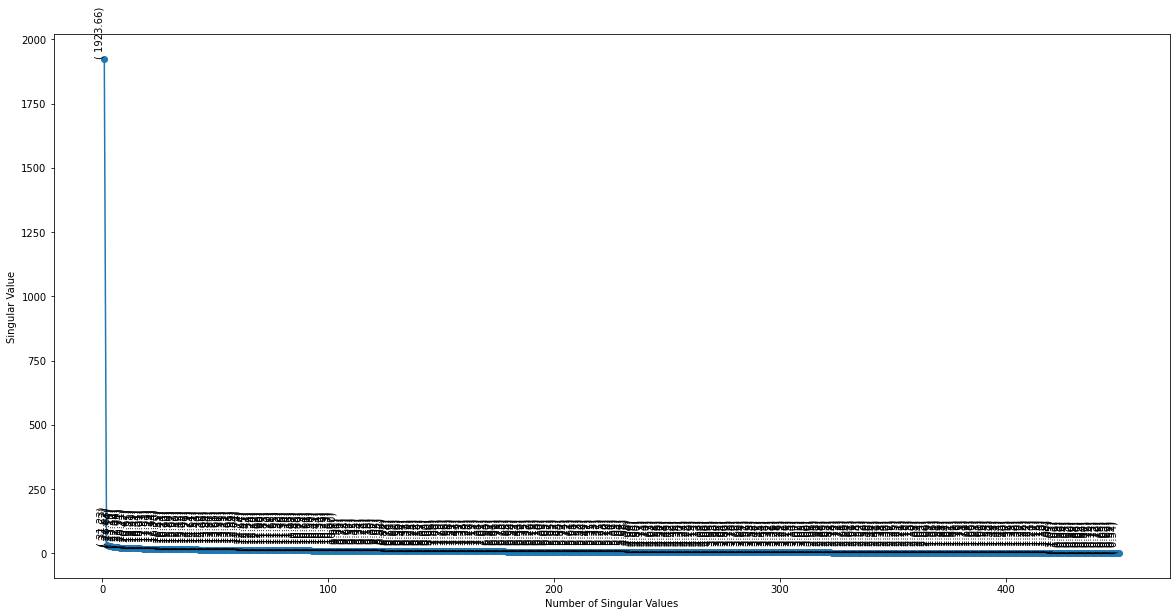

In [32]:
#PLOTTING ALL SINGLUAR VALUES
# it looks only first few are useful
plt.figure(figsize=(20,10))
plt.plot(range(1,451),Sigma,marker = "o")
plt.xlabel("Number of Singular Values")
plt.ylabel("Singular Value")
for i in range(1,451):
    plt.text(i, Sigma[i-1], f'( {Sigma[i-1]:.2f})', ha='right', va='bottom',rotation = 90)
  

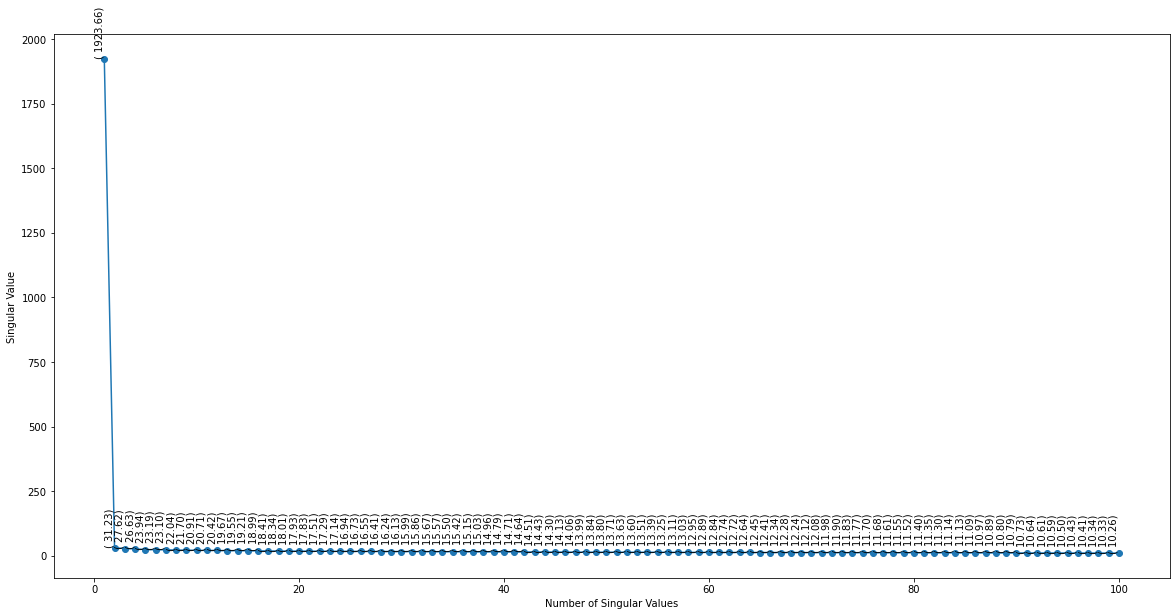

In [36]:
#data is highly varying in one dimesnion only and then a steady decline in small dimesnions
plt.figure(figsize=(20,10))
plt.plot(range(1,101),Sigma[:100],marker = "o")
plt.xlabel("Number of Singular Values")
plt.ylabel("Singular Value")
for i in range(1,101):
    plt.text(i, Sigma[i-1], f'( {Sigma[i-1]:.2f})', ha='right', va='bottom',rotation = 90)
  

In [131]:
#take first 10 column of U and First 10 rows of VT
Truncated_U = U[:,:10]
Truncated_VT = VT[:10,:]

In [132]:
#606 users in 10 dimension space
Truncated_U.shape

(606, 10)

In [133]:
#450 movies in 10 dimension space
Truncated_VT.shape

(10, 450)

## USER to Movie Recommendations

In [134]:
 movies_list = movie_features_df.columns

In [135]:
def SVD_user(user,num_recommendations):
    # Find the user's vector in the 10-dimensional space
    user_vector = Truncated_U[user - 1, :]  # Adjusting for zero-based indexing

    
    # Calculate the dot product with all movies
    movie_scores = np.dot(user_vector, Truncated_VT)
    
    # Sort movie scores in descending order
    sorted_movie_indices = np.argsort(movie_scores)[::-1]
     
    
    
    #array of user given rating to be excluded
    userrating = np.array(user_to_movie_df.loc[user])
    
    
    #get indices for user rating in decreasing order , then count only rating given and finally lenth of it
    #it gives total movie scence by user
    total_movie_scene = (userrating[np.argsort(userrating)[::-1]]>0).sum()
  
    #use same idences to sort movies and take first test2 movies
    moviealreadyseen = movies_list[np.argsort(userrating)[::-1]][:total_movie_scene]
    
    count = 0
    finallist=[]
    for i in movies_list[sorted_movie_indices]:
            if len(finallist) == num_recommendations:
                break
            elif i in moviealreadyseen:
                continue   
            else:
                finallist.append(i)
    

    return finallist


In [136]:
SVD_user(203,6)

['Ace Ventura: Pet Detective (1994)',
 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
 'Dumb & Dumber (Dumb and Dumber) (1994)',
 'Seven (a.k.a. Se7en) (1995)',
 'Ace Ventura: When Nature Calls (1995)',
 'Mask, The (1994)']

## Movie to Movie Recommendations

In [139]:
def SVD_movies(movie,num_recommendations):
    # Find the movie's vector in the 10-dimensional space
    query_index = list(movie_features_df.columns).index(movie)  # Get the column index of the movie
    
    movie_vector = Truncated_VT[:, query_index]
    

    # Calculate the dot product with all movies
    movie_scores = movie_vector.T@Truncated_VT
    

    # Sort movie scores in descending order
    sorted_movie_indices = np.argsort(movie_scores)[::-1]

    recommendations = []
    for idx in sorted_movie_indices:
        if movies_list[idx] != movie:
            recommendations.append(movies_list[idx])
        if len(recommendations) == num_recommendations:
            break

    return recommendations
    
    

In [140]:
SVD_movies('10 Things I Hate About You (1999)',10)

['Pretty Woman (1990)',
 'Star Trek: First Contact (1996)',
 'Titanic (1997)',
 'Independence Day (a.k.a. ID4) (1996)',
 'Men in Black (a.k.a. MIB) (1997)',
 'Finding Nemo (2003)',
 'Mission: Impossible II (2000)',
 'Interstellar (2014)',
 'Batman Forever (1995)',
 "Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)"]

In [144]:
#however when we take first 50 dimensions movie recommendations improves for movie to movie case

In [141]:
Truncated_U = U[:,:50]
Truncated_VT = VT[:50,:]

In [142]:
def SVD_movies(movie,num_recommendations):
    # Find the movie's vector in the 10-dimensional space
    query_index = list(movie_features_df.columns).index(movie)  # Get the column index of the movie
    
    movie_vector = Truncated_VT[:, query_index]
    

    # Calculate the dot product with all movies
    movie_scores = movie_vector.T@Truncated_VT
    

    # Sort movie scores in descending order
    sorted_movie_indices = np.argsort(movie_scores)[::-1]

    recommendations = []
    for idx in sorted_movie_indices:
        if movies_list[idx] != movie:
            recommendations.append(movies_list[idx])
        if len(recommendations) == num_recommendations:
            break

    return recommendations
    

In [143]:
SVD_movies('10 Things I Hate About You (1999)',10)

['Pretty Woman (1990)',
 'Batman Forever (1995)',
 'Miss Congeniality (2000)',
 'Notting Hill (1999)',
 'Mission: Impossible II (2000)',
 "You've Got Mail (1998)",
 'Finding Nemo (2003)',
 'Scary Movie (2000)',
 'Clueless (1995)',
 'Trainspotting (1996)']